In [1]:
# We load the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Set max number of columns displayed by pandas dataframe to 30

pd.set_option("display.max_columns", 30)

# We load the library containing functions we made for this project.

from utils import *

In [2]:
# First we load our dataset to a pandas dataframe.

df = load_data()
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [3]:
shape = df.shape
print("This dataframe has %d row and %d column." % (shape[0], shape[1]))

This dataframe has 1340 row and 21 column.


In [4]:
# We get some info about the dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [5]:
# We make the columns' names clearer and we convert our target column to int.

df.rename(columns={"3P Made": "3PM", "TARGET_5Yrs": "Target"}, inplace=True)
df["Target"] = df["Target"].astype(int)

In [6]:
# We get the statistics of the numerical features.

df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [7]:
# We compare the percentage columns to the division of Made by Attempts.

percent_columns = [c for c in df.select_dtypes("float").columns if c.endswith("%")]
dict_comp = {"Mean": [], "Standard deviation": []}
for c in percent_columns:
    col_perc = c
    col_made = c[:-1] + "M"
    col_attempt = c[:-1] + "A"
    comparison = (df[col_perc] - ((df[col_made] / df[col_attempt]) * 100)).agg({"mean": "mean", "std": "std"})
    dict_comp["Mean"].append(comparison[0])
    dict_comp["Standard deviation"].append(comparison[1])
pd.DataFrame(dict_comp, index=percent_columns)

,Mean,Standard deviation
FG%,-0.051090,0.872526
3P%,2.180722,10.880637
FT%,-0.355259,4.066527


We understand that percentage values are divisions of made by attempts.

1    831
0    509
Name: Target, dtype: int64


<AxesSubplot:xlabel='Target', ylabel='count'>

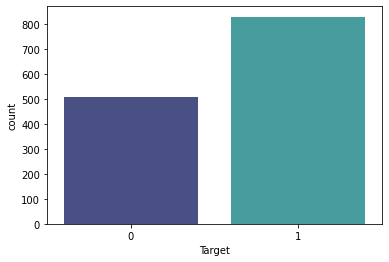

In [8]:
# We visualize our classes distribution.

print(df["Target"].value_counts())
sns.countplot(x="Target", data=df, palette="mako")

In [9]:
# We analyze missing values in dataframe.

missing_values_table(df)

Your selected dataframe has 21 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
3P%,11,0.82


In [10]:
# We check the null values.

null_idx = [index for index, row in df.iterrows() if row.isnull().any()]
df_null = df.iloc[null_idx]
df_null

,Name,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,0.3,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,1.4,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,0.8,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,0.3,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,0.8,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,1.0,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,0.7,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,0.5,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0


Apparently the null values are for players who have not shot any 3 Points.
So, we will replace the null values with 0.

In [11]:
# We replace null values with 0.

df.fillna(0, inplace=True)
df_null_replaced = df.iloc[null_idx]
df_null_replaced

,Name,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,0.0,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,0.0,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,0.0,0.3,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,0.0,1.4,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,0.0,0.8,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,0.0,0.3,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,0.0,0.8,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,0.0,1.0,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,0.0,0.7,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,0.0,0.5,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0


In [12]:
# We check for duplicates regardless of the target.

duplicate_idx = df[df.duplicated(subset=df.columns[1:-1], keep=False)].index
df_duplicate_diff = df.iloc[duplicate_idx]
print("There are %d duplicates with different targets." % df_duplicate_diff.shape[0])
df_duplicate_diff

There are 59 duplicates with different targets.


,Name,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
18,Larry Johnson,82,37.2,19.2,7.5,15.3,49.0,0.1,0.3,22.7,4.1,5.0,82.9,3.9,7.0,11.0,3.6,1.0,0.6,1.9,0
19,Larry Johnson,82,37.2,19.2,7.5,15.3,49.0,0.1,0.3,22.7,4.1,5.0,82.9,3.9,7.0,11.0,3.6,1.0,0.6,1.9,1
71,Dee Brown,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,1.7,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,0
72,Dee Brown,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,1.7,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,1
73,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,0.5,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,0
74,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,0.5,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,1
120,Tim Hardaway,79,33.7,14.7,5.9,12.5,47.1,0.3,1.1,27.4,2.7,3.5,76.4,0.7,3.2,3.9,8.7,2.1,0.1,3.3,0
121,Tim Hardaway,79,33.7,14.7,5.9,12.5,47.1,0.3,1.1,27.4,2.7,3.5,76.4,0.7,3.2,3.9,8.7,2.1,0.1,3.3,1
126,Glen Rice,77,30.0,13.6,6.1,13.9,43.9,0.2,0.9,24.6,1.2,1.6,73.4,1.3,3.3,4.6,1.8,0.9,0.3,1.5,1
127,Glen Rice,77,30.0,13.6,6.1,13.9,43.9,0.2,0.9,24.6,1.2,1.6,73.4,1.3,3.3,4.6,1.8,0.9,0.3,1.5,0


There are some rows with similar values. Which can be quite misleading for our models.

In [13]:
# We will aggregate on the target column.

df_duplicate_diff_group = df_duplicate_diff.groupby(list(df.columns[1:-1])).agg({"Target": "mean"})
df_duplicate_diff_group 

,,,,,,,,,,,,,,,,,,,Target
GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,
29,16.4,3.7,1.3,4.2,31.7,0.7,2.1,31.1,0.4,0.8,50.0,0.3,1.1,1.4,1.4,0.6,0.2,1.0,0.333333
33,7.8,3.8,1.5,3.1,48.0,0.0,0.3,10.0,0.8,1.0,82.4,0.5,0.6,1.1,0.4,0.4,0.1,0.4,0.500000
34,8.6,3.5,1.4,3.7,39.2,0.4,1.4,31.9,0.2,0.3,54.5,0.4,0.4,0.8,0.6,0.3,0.2,0.8,0.666667
35,24.5,10.4,4.3,12.2,35.6,0.4,1.7,22.4,1.4,1.9,72.7,1.6,1.8,3.4,1.7,0.8,0.6,1.8,1.000000
43,8.3,2.6,0.9,2.4,35.6,0.1,0.4,21.1,0.8,1.1,74.5,0.3,0.9,1.3,0.3,0.2,0.2,0.3,1.000000
44,7.6,2.5,1.0,2.1,46.2,0.0,0.2,11.1,0.5,0.9,56.1,0.5,0.8,1.3,0.4,0.3,0.0,0.4,0.500000
49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,0.5,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,0.500000
57,10.0,3.3,1.0,2.6,36.9,0.1,0.2,30.8,1.3,2.0,63.8,1.0,1.2,2.2,0.8,0.7,0.4,1.2,0.500000
60,8.7,2.9,1.0,2.2,44.4,0.0,0.1,0.0,0.9,1.3,69.7,0.2,0.9,1.2,1.7,0.6,0.1,0.6,0.666667


To keep the information of duplicates, we will assume that the true value is a majority vote. In case of a tie, label 0 will be prioritized to decrease the gap between target value counts. Duplicates with mismatched labels may also be dropped to not mislead the models. 

In [14]:
# We will adjust target differences in the target column.

df.iloc[duplicate_idx, -1] = df_duplicate_diff.groupby(list(df.columns[1:-1]))["Target"] \
    .transform(lambda x: 1 * (x.mean() >= 0.5) + 0 * (x.mean() < 0.5))
df.iloc[duplicate_idx]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
18,Larry Johnson,82,37.2,19.2,7.5,15.3,49.0,0.1,0.3,22.7,4.1,5.0,82.9,3.9,7.0,11.0,3.6,1.0,0.6,1.9,1
19,Larry Johnson,82,37.2,19.2,7.5,15.3,49.0,0.1,0.3,22.7,4.1,5.0,82.9,3.9,7.0,11.0,3.6,1.0,0.6,1.9,1
71,Dee Brown,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,1.7,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,1
72,Dee Brown,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,1.7,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,1
73,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,0.5,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,1
74,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,0.5,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,1
120,Tim Hardaway,79,33.7,14.7,5.9,12.5,47.1,0.3,1.1,27.4,2.7,3.5,76.4,0.7,3.2,3.9,8.7,2.1,0.1,3.3,1
121,Tim Hardaway,79,33.7,14.7,5.9,12.5,47.1,0.3,1.1,27.4,2.7,3.5,76.4,0.7,3.2,3.9,8.7,2.1,0.1,3.3,1
126,Glen Rice,77,30.0,13.6,6.1,13.9,43.9,0.2,0.9,24.6,1.2,1.6,73.4,1.3,3.3,4.6,1.8,0.9,0.3,1.5,1
127,Glen Rice,77,30.0,13.6,6.1,13.9,43.9,0.2,0.9,24.6,1.2,1.6,73.4,1.3,3.3,4.6,1.8,0.9,0.3,1.5,1


In [15]:
# We will now drop all duplicates.

df.drop_duplicates(inplace=True)

 We will add a new feature Effective Field Goal Percentage :
 https://www.nbastuffer.com/analytics101/effective-field-goal-percentage-efg/
 to measure the effectiveness of 2-point shots and 3-point shots.

In [16]:
# We will add a new feature.

df.insert(loc=10, column="EFG%", value=round((df["FGM"] + 0.5 * df["3PM"]) * 100 / df["FGA"], 1))

1    822
0    486
Name: Target, dtype: int64


<AxesSubplot:xlabel='Target', ylabel='count'>

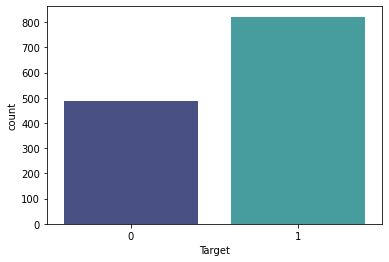

In [17]:
# We visualize our new classes distribution.

print(df["Target"].value_counts())
sns.countplot(x="Target", data=df, palette="mako")

We don't have a problem with data imbalance.

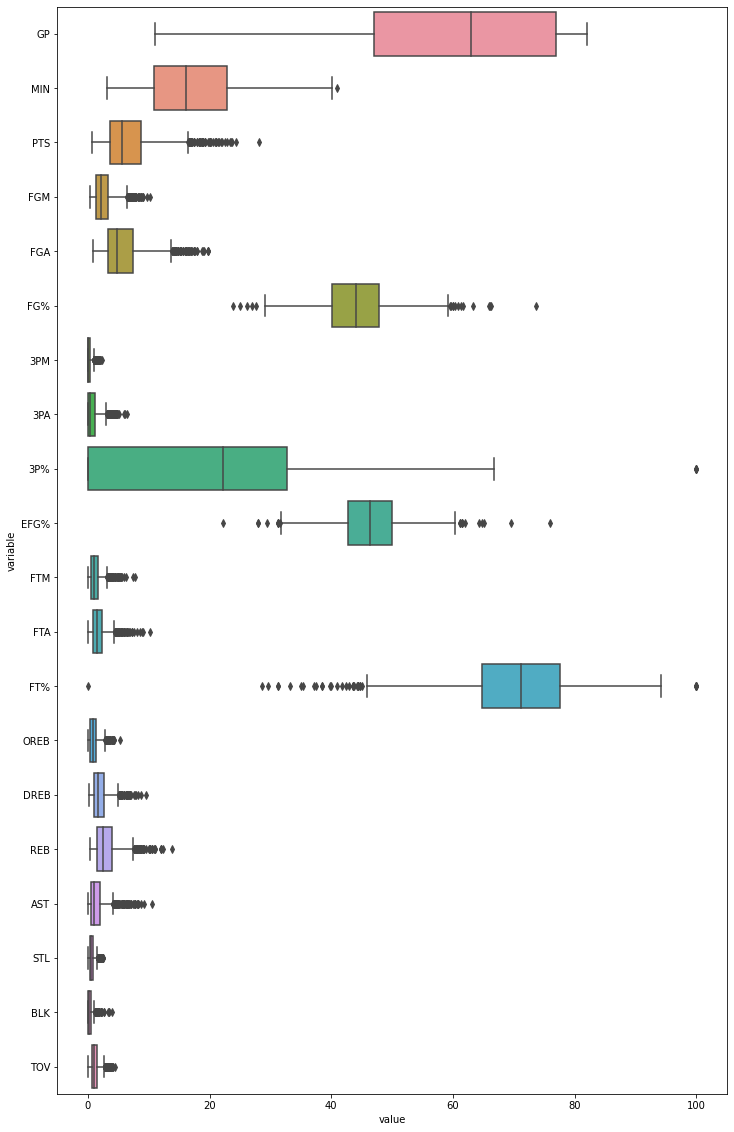

In [18]:
# We plot numerical columns distribution with boxplots.

plt.figure(figsize= (12,20))
sns.boxplot(x="value", y="variable", data=pd.melt(df.iloc[:, 1:-1]), orient="h")
plt.show()

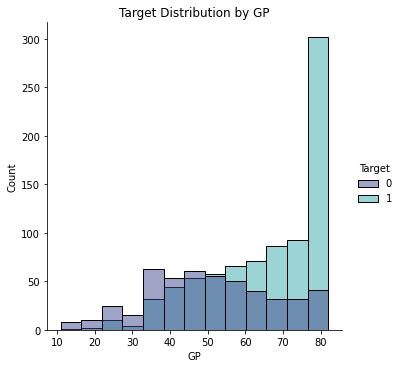

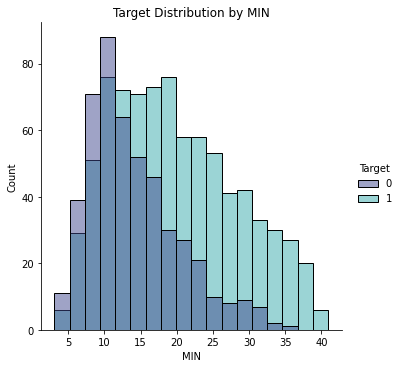

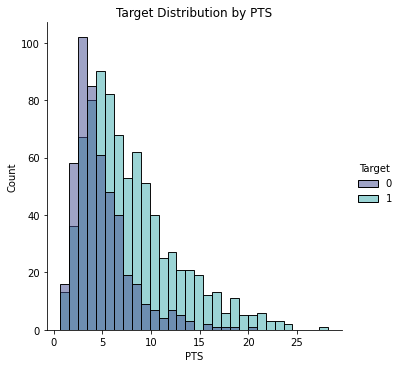

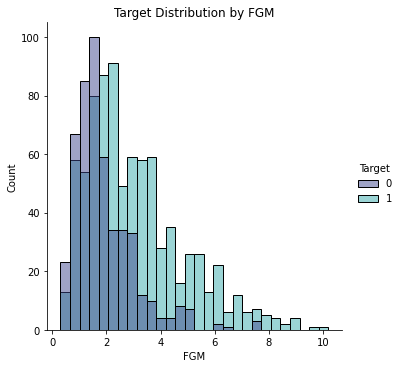

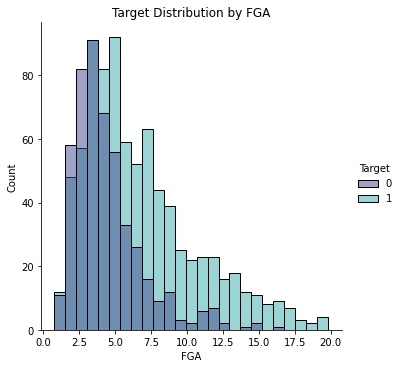

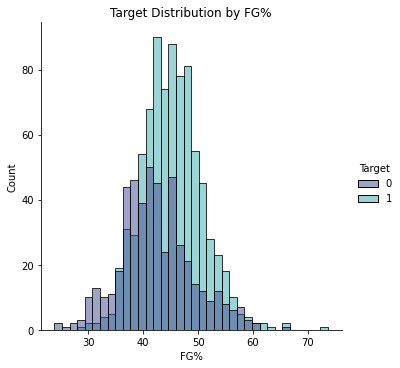

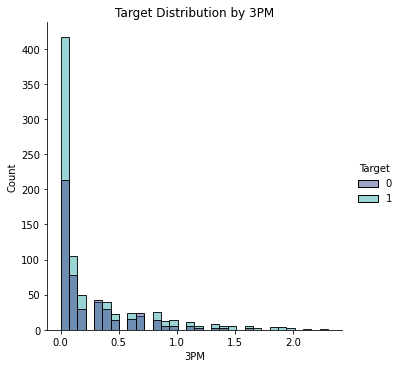

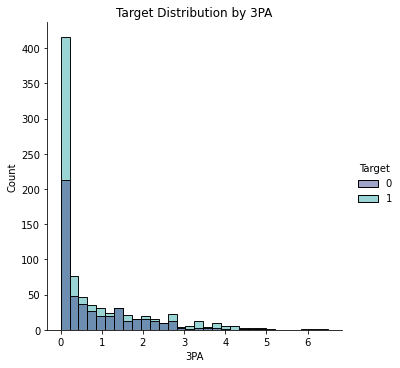

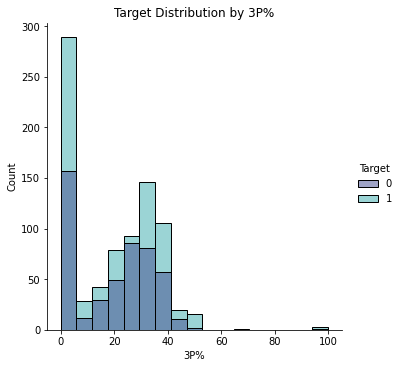

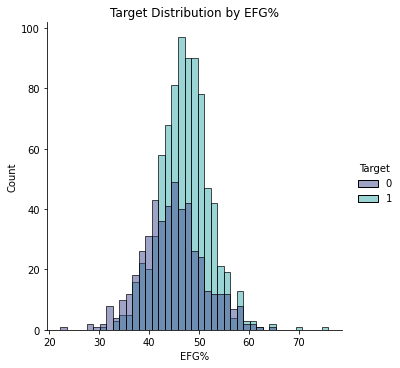

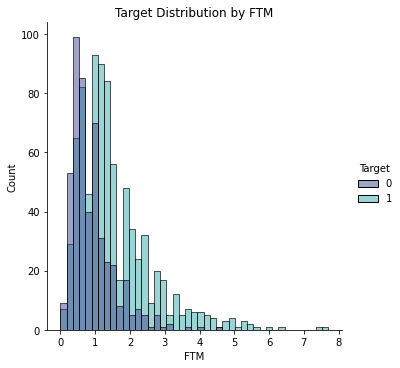

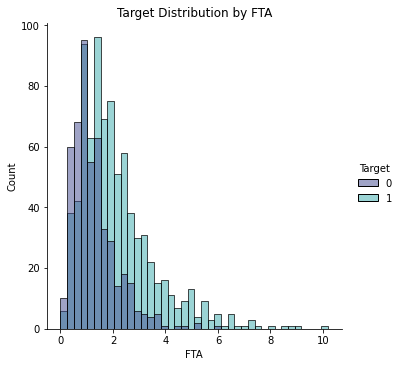

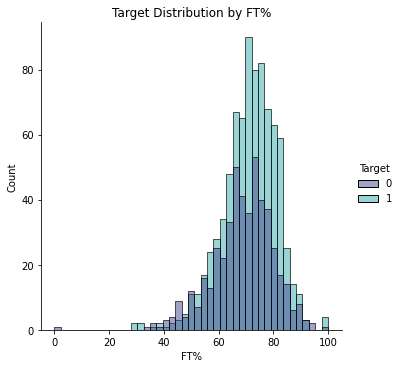

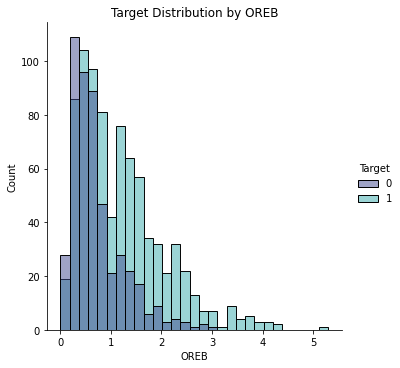

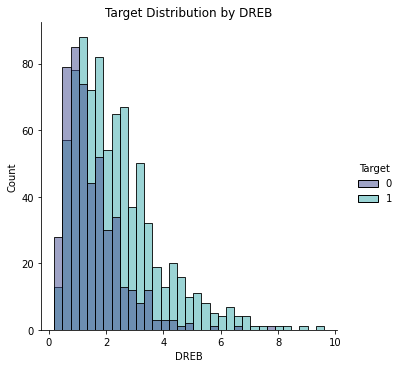

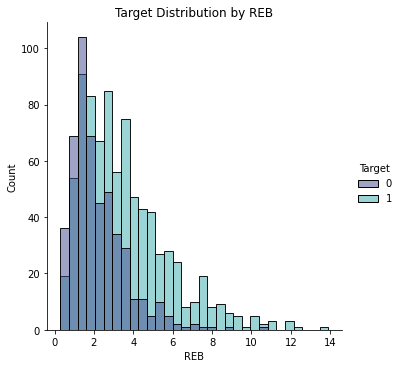

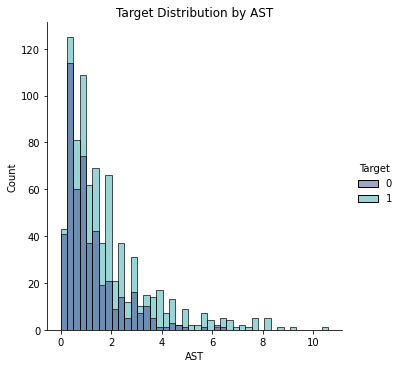

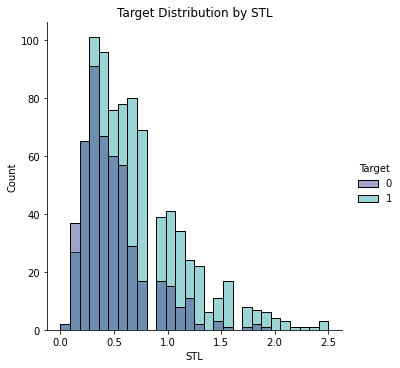

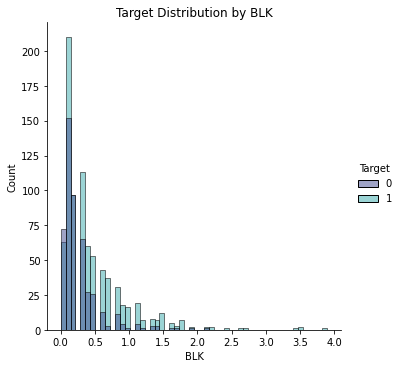

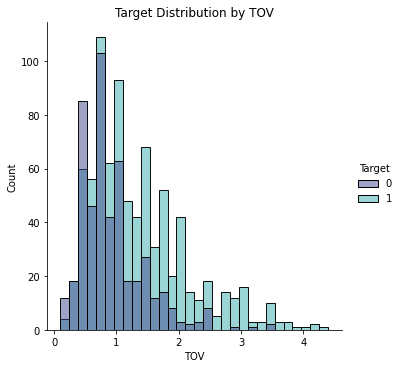

In [19]:
# We plot class distribution by numerical columns.

distplot_by_target(df, df.columns[1:-1])

-	Players with many games played are more likely to have career length above 5years
-	Players with fewer minutes played are more likely to have career length below 5years

,Feature Importance
FGM,0.090501
GP,0.081466
FGA,0.063737
REB,0.062370
FTA,0.059192
FTM,0.056932
MIN,0.053238
DREB,0.050503
OREB,0.050305
PTS,0.045933


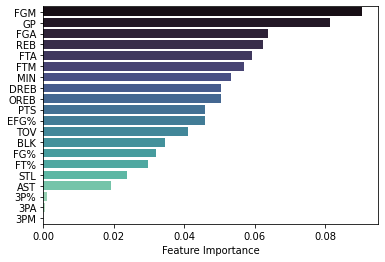

In [20]:
# We analyze dependencies between features.

importances = mutual_info_classif(df.iloc[:, 1:-1], df.iloc[:, -1], random_state=0)
feat_importance = pd.DataFrame(importances, df.columns[1:-1], columns=["Feature Importance"]) \
    .sort_values("Feature Importance", ascending=False)
display(feat_importance)
sns.barplot(orient="h", data=feat_importance, x="Feature Importance", y=feat_importance.index, palette="mako")
plt.show()

We notice that the 3 Points features hold low information about the target. Moreover, they don't show any dependency on the target.

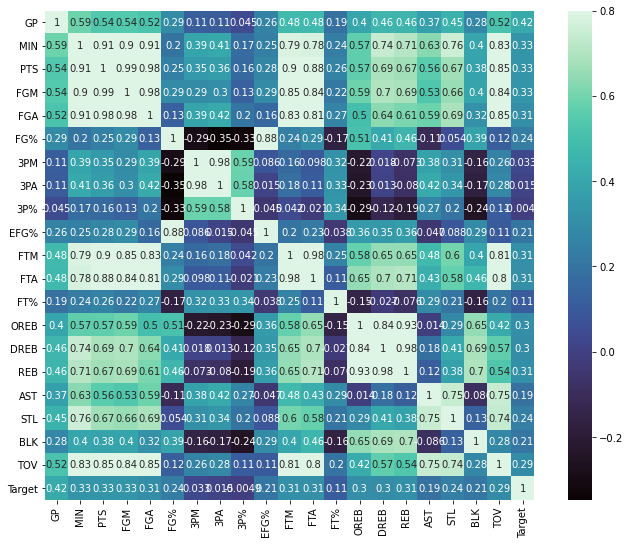

In [21]:
# We analyze the correlation between features.

correlation_heatmap(df, matrix=True)

- We notice that 3 Points features are again uncorrelated to the target.
- We notice that 3PA is highly correlated to 3PM.
- We notice also that PTS is highly correlated to FGM and FGA.
- We notice also that FGM is highly correlated to FGA.
- We notice also that FTA is highly correlated to FTM.
- We notice that REB is highly correlated to DREB.
</br>We will move to model development phase with a set of features : ["GP", "MIN", "FGA", "FG%", "EFG%", "FTM", "FT%", "OREB", "DREB", "AST", "STL", "BLK", "TOV"]

In [22]:
# We finally save our processed data with and without feature selection.

df_selected_feature = df[["Name", "GP", "MIN", "FGA", "FG%", "EFG%", "FTM",
                          "FT%", "OREB", "DREB", "AST", "STL", "BLK", "TOV", "Target"]]

save_data(df)
save_data(df_selected_feature, file=r"nba_logreg_selected.csv")